In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
corn_and_olives_datasets =pd.DataFrame.from_dict({
    "shape":['round', "oval"],
    "color":['yellow', 'green'], 
    "ingredients_type":['corn', 'olives'], 
    

}
)

In [31]:
corn_and_olives_datasets

,shape,color,ingredients_type
0,round,yellow,corn
1,oval,green,olives


In [32]:
corn_and_olives_datasets["c_shape"] = corn_and_olives_datasets["shape"].apply(lambda x:1 if x == 'round' else 0)  
corn_and_olives_datasets["c_color"] = corn_and_olives_datasets["color"].apply(lambda x:1 if x == 'yellow' else 0) 
corn_and_olives_datasets["c_ingredients_type"] = corn_and_olives_datasets["ingredients_type"].apply(lambda x:1 if x == 'corn' else 0)  
corn_and_olives_datasets

,shape,color,ingredients_type,c_shape,c_color,c_ingredients_type
0,round,yellow,corn,1,1,1
1,oval,green,olives,0,0,0


<AxesSubplot:xlabel='c_shape', ylabel='c_color'>

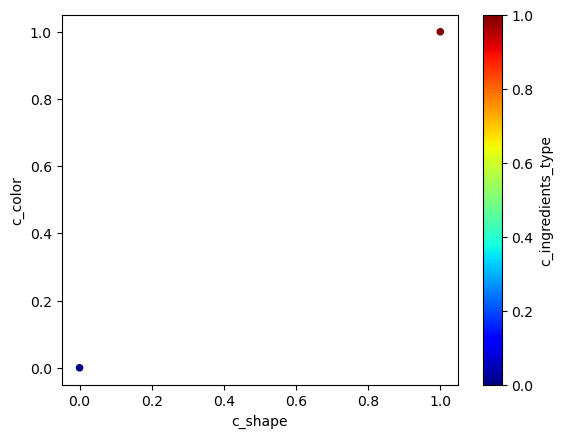

In [33]:
corn_and_olives_datasets.plot(
    kind='scatter',
    x='c_shape',
    y='c_color',
    c='c_ingredients_type',
    colormap='jet'
)

In [34]:
from tensorflow.keras.layers import Dense

single_neuron_layer = Dense(
    units=1,
    input_dim=2,
    activation="sigmoid",
)

In [35]:
from tensorflow.keras.optimizers import SGD
sgd = SGD()

In [36]:
sgd

In [37]:
from tensorflow.keras.models import Sequential
single_neuron_model = Sequential()

In [38]:
loss = 'binary_crossentropy'
single_neuron_model.add(single_neuron_layer)
single_neuron_model.compile(loss=loss, optimizer=sgd, metrics=['accuracy'])
single_neuron_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = single_neuron_model.fit(
    corn_and_olives_datasets[['c_shape', 'c_color']].values,
    corn_and_olives_datasets[['c_ingredients_type']].values,
    epochs=2500
)

Epoch 1/2500
1/1 [==============================] - 1s 916ms/step - loss: 0.5525 - accuracy: 1.0000
Epoch 2/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.5519 - accuracy: 1.0000
Epoch 3/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 1.0000
Epoch 4/2500
1/1 [==============================] - 0s 6ms/step - loss: 0.5506 - accuracy: 1.0000
Epoch 5/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.5500 - accuracy: 1.0000
Epoch 6/2500
1/1 [==============================] - 0s 10ms/step - loss: 0.5494 - accuracy: 1.0000
Epoch 7/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.5487 - accuracy: 1.0000
Epoch 8/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.5481 - accuracy: 1.0000
Epoch 9/2500
1/1 [==============================] - 0s 10ms/step - loss: 0.5475 - accuracy: 1.0000
Epoch 10/2500
1/1 [==============================] - 0s 8ms/step - loss: 0.5469 - accuracy: 1.0000
Epoch 11/2500
1

In [41]:
test_loss,test_acc = single_neuron_model.evaluate(
    corn_and_olives_datasets[['c_shape', 'c_color']],
    corn_and_olives_datasets[['c_ingredients_type']]
)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 166ms/step - loss: 0.1215 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.1214621514081955, accuracy = 1.0
